In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
Train_data=pd.read_csv("./Training.csv")
Test_data=pd.read_csv("./Testing.csv")

In [3]:
train_df=pd.DataFrame(Train_data)
train_df.head(15)
train_df=train_df.drop(['Unnamed: 133'],axis=1)
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
test_df=pd.DataFrame(Test_data)
test_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [5]:
y_train=train_df['prognosis']
x_train=train_df.drop(['prognosis'],axis=1)
y_train.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [6]:
test_df.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [7]:
x_test=test_df.drop(['prognosis'],axis=1)
y_test=test_df['prognosis']

In [8]:
dummy=LabelEncoder().fit_transform(train_df['prognosis'])
y_train=pd.DataFrame(dummy)

In [9]:
y_train.head()
print(y_train)

       0
0     15
1     15
2     15
3     15
4     15
...   ..
4915   0
4916   2
4917  38
4918  35
4919  27

[4920 rows x 1 columns]


In [10]:
dummy=LabelEncoder().fit_transform(test_df['prognosis'])
y_test=pd.DataFrame(dummy)
y_test.head()
len(y_test)

42

In [11]:
model=Sequential([
    Dense(units=200,activation='relu'),
    Dense(units=150,activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=42,activation='softmax')
])

In [12]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'])
# model.summary()

In [13]:
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10


C:\Users\ARPIT MATHUR\AppData\Roaming\Python\Python311\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


39/39 [==============================] - 1s 10ms/step - loss: 2.6163 - accuracy: 0.6976 - val_loss: 0.8324 - val_accuracy: 0.9762
Epoch 2/10
17/39 [============>.................] - ETA: 0s - loss: 0.4187 - accuracy: 0.9977

C:\Users\ARPIT MATHUR\AppData\Roaming\Python\Python311\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


39/39 [==============================] - 0s 4ms/step - loss: 0.2131 - accuracy: 0.9990 - val_loss: 0.0386 - val_accuracy: 0.9762
Epoch 3/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0268 - val_accuracy: 1.0000
Epoch 4/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 5/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0264 - val_accuracy: 1.0000
Epoch 6/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 0.9762
Epoch 7/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0276 - val_accuracy: 0.9762
Epoch 8/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0271 - val_accuracy: 0.9762
Epoch 9/10
39/39 [=============

In [14]:
prediction=model.predict(x_test)
prediction[1]

2/2 [==============================] - 0s 3ms/step


array([1.01010421e-07, 3.97957649e-08, 6.92470678e-07, 5.03264300e-06,
       9.99786079e-01, 1.14114855e-05, 2.27573873e-05, 2.78201833e-06,
       8.42698142e-08, 3.38539263e-09, 1.50826168e-06, 1.58159537e-07,
       7.68197737e-08, 4.82358189e-07, 1.60417329e-07, 5.19050730e-07,
       4.88281501e-07, 7.21442048e-05, 1.40580755e-06, 3.47387839e-07,
       8.02585163e-08, 5.89672311e-07, 2.22863059e-06, 1.12548460e-05,
       2.65792619e-06, 4.60668133e-07, 1.52750758e-07, 2.69197301e-07,
       1.52991743e-05, 9.02841180e-07, 1.58268108e-06, 3.79038624e-07,
       1.82197182e-05, 2.94562852e-07, 2.48106680e-05, 4.35471037e-07,
       1.62005634e-07, 3.61756588e-06, 5.30311036e-06, 4.73775071e-06,
       3.19553806e-07, 2.15591776e-08], dtype=float32)

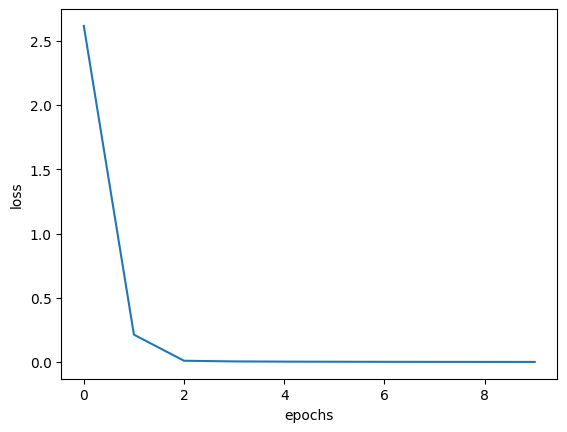

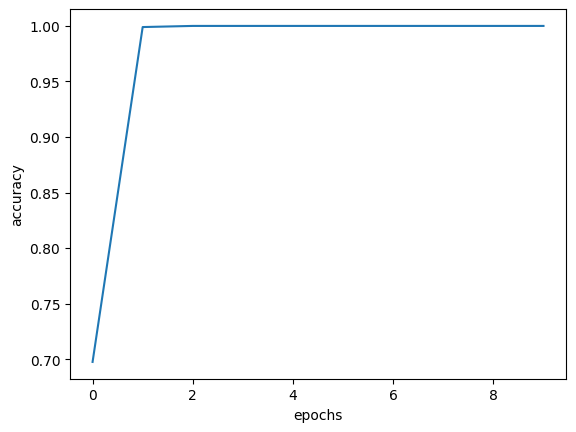

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()


In [16]:
pred=np.argmax(prediction, axis=1)
original=y_test[0]
print(original[41])

15


In [22]:
print(y_test.shape[0])

42


In [27]:
confusion = confusion_matrix(original,pred)

fig = px.imshow(confusion, labels=dict(x="Predicted Value", y="Actual Vlaue"),text_auto=True, title='Confusion Matrix')
fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
count=0
for i in range(41):
    if(pred[i]-original[i]!=0):
        count+=1

Test_accuracy=(42-count)/42*100
for i in range(10):
    print(f"Predicted: {pred[i]}, Actual: {original[i]}")

Predicted: 15, Actual: 15
Predicted: 4, Actual: 4
Predicted: 16, Actual: 16
Predicted: 9, Actual: 9
Predicted: 14, Actual: 14
Predicted: 33, Actual: 33
Predicted: 1, Actual: 1
Predicted: 12, Actual: 12
Predicted: 17, Actual: 17
Predicted: 6, Actual: 6


In [ ]:
print("Test Data Accuracy using ANN=",Test_accuracy,"%")

Test Data Accuracy using ANN= 100.0 %


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42) 
clf.fit(x_train, y_train)

C:\Users\ARPIT MATHUR\AppData\Local\Temp\ipykernel_15724\2396451994.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
rf_predictions = clf.predict(x_test)
print(len(rf_predictions))

42


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, rf_predictions)
mse = mean_squared_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.2857142857142857
Mean Squared Error: 3.4285714285714284
R-squared: 0.975019103281634


In [ ]:
count=0
for i in range(41):
    if(rf_predictions[i]-original[i]!=0):
        count+=1

rf_Test_accuracy=(42-count)/42*100

In [ ]:
print(f"Random Forest Test Accuracy:",Test_accuracy,'%')

Random Forest Test Accuracy: 100.0 %
